# Overview of data

Import the needed package first

In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 105)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import folium

%matplotlib inline
sns.set()

In [2]:
def get_cycle_collision_data() -> pd.DataFrame:
    raw_data = pd.read_csv('cycle_crash/Motor_Vehicle_Collisions_-_Crashes.csv', low_memory=False)
    raw_data = raw_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)  # strip whitespace value
    
    raw_data = raw_data[raw_data.BOROUGH.notnull()]  # remove empty borough rows
    
    # convert to numeric type
    raw_data['NUMBER OF PERSONS INJURED'] = pd.to_numeric(raw_data['NUMBER OF PERSONS INJURED'],errors='coerce')
    raw_data['NUMBER OF PERSONS KILLED'] = pd.to_numeric(raw_data['NUMBER OF PERSONS KILLED'],errors='coerce')
    raw_data['LATITUDE'] = pd.to_numeric(raw_data['LATITUDE'],errors='coerce')
    raw_data['LONGITUDE'] = pd.to_numeric(raw_data['LONGITUDE'],errors='coerce')
    
    raw_data.replace(np.nan, '', inplace=True)

    return raw_data

In [3]:
df = get_cycle_collision_data()

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1117715 entries, 0 to 1604017
Data columns (total 29 columns):
ACCIDENT DATE                    1117715 non-null object
ACCIDENT TIME                    1117715 non-null object
BOROUGH                          1117715 non-null object
ZIP CODE                         1117715 non-null object
LATITUDE                         1117715 non-null object
LONGITUDE                        1117715 non-null object
LOCATION                         1117715 non-null object
ON STREET NAME                   1117715 non-null object
CROSS STREET NAME                1117715 non-null object
OFF STREET NAME                  1117715 non-null object
NUMBER OF PERSONS INJURED        1117715 non-null object
NUMBER OF PERSONS KILLED         1117715 non-null object
NUMBER OF PEDESTRIANS INJURED    1117715 non-null int64
NUMBER OF PEDESTRIANS KILLED     1117715 non-null int64
NUMBER OF CYCLIST INJURED        1117715 non-null int64
NUMBER OF CYCLIST KILLED         11

,ACCIDENT DATE,ACCIDENT TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/05/2019,17:40,MANHATTAN,10012,40.7264,-74.0013,POINT (-74.00134 40.726418),,,128 THOMPSON STREET,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,,,,4109787,Sedan,Sedan,,,
1,04/27/2019,5:20,BROOKLYN,11235,40.5922,-73.9326,POINT (-73.932556 40.592213),,,2501 KNAPP STREET,0,0,0,0,0,0,0,0,Drugs (illegal),Unspecified,,,,4122270,Sedan,Sedan,,,
4,05/01/2019,7:50,MANHATTAN,10002,40.7132,-73.9808,POINT (-73.98082 40.713226),,,18 JACKSON STREET,0,0,0,0,0,0,0,0,Other Vehicular,Unspecified,,,,4123894,Sedan,Sedan,,,
5,04/11/2019,20:00,QUEENS,11427,40.7325,-73.7656,POINT (-73.765564 40.732536),UNION TURNPIKE,CLEARVIEW EXPRESSWAY,,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,,,,4113041,Sedan,Station Wagon/Sport Utility Vehicle,,,
6,04/02/2019,11:00,BROOKLYN,11221,40.6864,-73.9425,POINT (-73.94247 40.68639),,,404 MONROE STREET,0,0,0,0,0,0,0,0,Other Vehicular,Unspecified,,,,4107489,Sedan,,,,


## Proportion of different accident
Show the percentage of injured and killed person with different transport vehicle

             INJURED  KILLED
PEDESTRIANS    66232     717
CYCLIST        26693     104
MOTORIST      189410     383


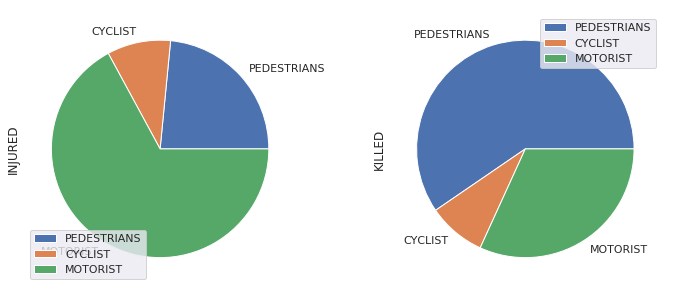

In [5]:
SITUATION = ['INJURED', 'KILLED']
TRANSPORT = ['PEDESTRIANS', 'CYCLIST', 'MOTORIST']

tmp = df[['NUMBER OF {} {}'.format(transport, situation) for transport in TRANSPORT
              for situation in SITUATION ]].sum()

sum_data = [{situation: tmp.loc['NUMBER OF {} {}'.format(transport, situation)] 
      for situation in SITUATION} for transport in TRANSPORT]
sum_df = pd.DataFrame(sum_data, index= TRANSPORT)
print(sum_df)
plot = sum_df.plot.pie(subplots=True, figsize=(12, 5))

As the pie chart shown, the injured and killed cyclist both occupy the lowest proportion.

# Bicycle Accident

Let's check out the details of bike accident

In [6]:
df_cycle = df[(df['NUMBER OF CYCLIST KILLED'] > 0) | (df['NUMBER OF CYCLIST KILLED'] > 0)]

In [7]:
type_1 = df_cycle['VEHICLE TYPE CODE 1'].value_counts()
type_2 = df_cycle['VEHICLE TYPE CODE 2'].value_counts()
type_3 = df_cycle['VEHICLE TYPE CODE 3'].value_counts()
type_4 = df_cycle['VEHICLE TYPE CODE 4'].value_counts()

type_1 = type_1.add(type_2, fill_value=0)
type_1 = type_1.add(type_3, fill_value=0)
type_1.add(type_4, fill_value=0).sort_values(ascending=False)

                                       189.0
BICYCLE                                 89.0
PASSENGER VEHICLE                       37.0
Bike                                    21.0
Station Wagon/Sport Utility Vehicle     17.0
SPORT UTILITY / STATION WAGON           15.0
UNKNOWN                                  9.0
LARGE COM VEH(6 OR MORE TIRES)           5.0
TAXI                                     4.0
VAN                                      3.0
BUS                                      2.0
Box Truck                                2.0
PICK-UP TRUCK                            2.0
Sedan                                    2.0
Tanker                                   2.0
Tractor Truck Diesel                     2.0
SMALL COM VEH(4 TIRES)                   1.0
LIVERY VEHICLE                           1.0
TN                                       1.0
FB                                       1.0
Dump                                     1.0
DS                                       1.0
Concrete M

The cyclist was most crashed with passenger vehicle, followed by Station Wagon.

## Distribution of accident location (bike)

The more accident happened in the same area, the warmer it will be displayed in the map

In [8]:
m = folium.Map(location=[40.7057, -73.9205])

In [9]:
from folium.plugins import HeatMap


pos_data = []
for each in df_cycle.iterrows():
    if each[1]['LATITUDE']!="" and each[1]['LONGITUDE']!="":
        pos_data.append([each[1]['LATITUDE'],each[1]['LONGITUDE']])
mc = HeatMap(pos_data)

In [10]:
m.add_child(mc)

display(m)

## Count accident times by borough

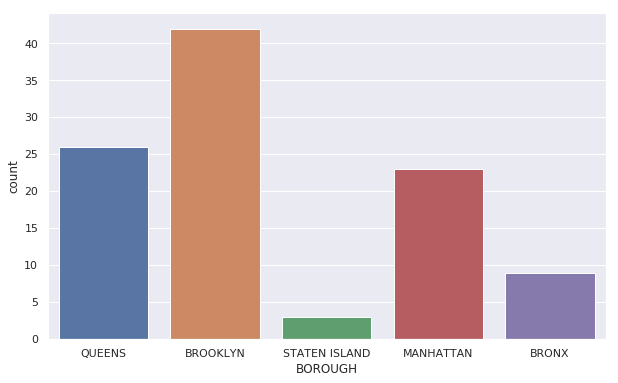

In [11]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x= 'BOROUGH',data = df_cycle)

The Brooklyn has the most bibe accident, followed by queens and manhattan.

## Count accident times by year

In [12]:
pd.set_option('mode.chained_assignment', None)
df_cycle['ACCIDENT DATETIME'] = pd.to_datetime(df_cycle['ACCIDENT DATE'] + ' ' +df_cycle['ACCIDENT TIME'])
df_cycle['ACCIDENT TIME'] = pd.to_datetime(df_cycle['ACCIDENT TIME'], format="%H:%M").dt.time
df_cycle['ACCIDENT DATE'] = pd.to_datetime(df_cycle['ACCIDENT DATE'], format="%m/%d/%Y")

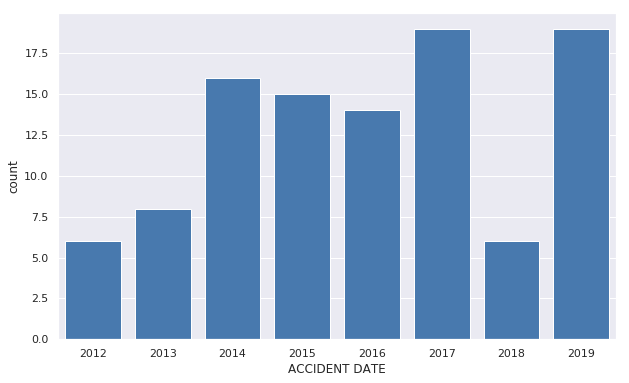

In [13]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x= df_cycle['ACCIDENT DATE'].dt.year, data = df_cycle, palette=sns.xkcd_palette(['windows blue']))

## Count injured or killed cyclist by time

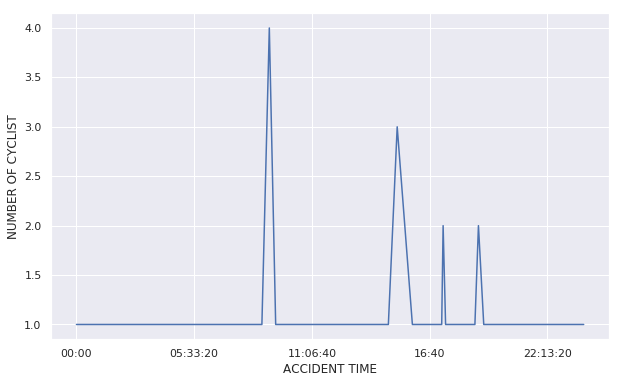

In [14]:
df_cycle['NUMBER OF CYCLIST'] = df_cycle["NUMBER OF CYCLIST INJURED"] + df_cycle["NUMBER OF CYCLIST KILLED"]
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='ACCIDENT TIME',y= 'NUMBER OF CYCLIST', data=df_cycle)

Most cycle accident happped in the noon and afternoon, shown in the graph.